##**Obtenção das bases de imagens:**
*Baixar as imagens de teste diretamente do github*

*Obs.: Desta forma as imagens ficarão disponíveis somente enquanto esta sessão permanecer ativa ou até que o usuário  clique em no menu: Runtime>Factory reset runtime*

In [ ]:
!git clone https://github.com/guimota-uerj/TestImages.git
!pwd
!ls

Cloning into 'TestImages'...
remote: Enumerating objects: 104, done.
remote: Total 104 (delta 0), reused 0 (delta 0), pack-reused 104
Receiving objects: 100% (104/104), 19.32 MiB | 27.06 MiB/s, done.
Resolving deltas: 100% (21/21), done.
/content
sample_data  TestImages


*Entrar na pasta da imagem de teste utilizada*

In [ ]:
%cd /content/TestImages/Logos/
!ls

/content/TestImages/Logos
CCompLogo1.png	logo_LPG_visor.pdf  logo_uerj_cor.pdf


# **Questão:**

\

A derivada parcial em $x$ do gradiente digital definido por Roberts é dada pela matriz

\

$ G_x=\begin{vmatrix}
-1 & -2 & -1\\
0 & 0 & 0 \\
1 & 2 & 1
\end{vmatrix}$

\

Esta matriz pode ser fatorada em duas matrizes: $Gx_v$, com dimensões $3\times1$, e  $Gx_h$, com dimensões $1\times3$.

\

$  Gx = Gx_v*Gx_h = \begin{vmatrix}
-1 \\
0  \\
1
\end{vmatrix} * \begin{vmatrix}
1 & 2 & 1
\end{vmatrix} $

\

Dada a função imagem $f$, compare do ponto de vista quantitativo e qualitativo os resultados obtidos por:

\

(A). $f*Gx$

(B). $f*Gx_v* Gx_h$

(C). $f* Gx_h * Gx_v$

\
Para isso, modifique o código a seguir de forma a implementar as estratégias (B) e (C) .

\
Dica: Ampare-se nas propriedades de comutatividade e associatividade da convolução e no cálculo do erro quadrático para realizar sua argumentação.

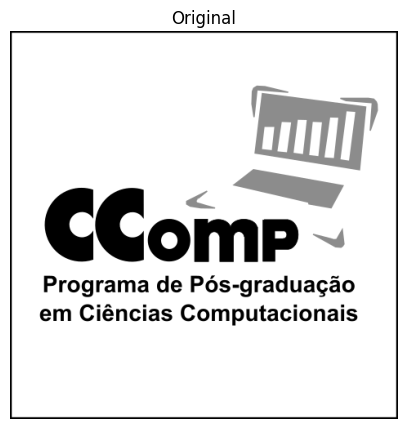

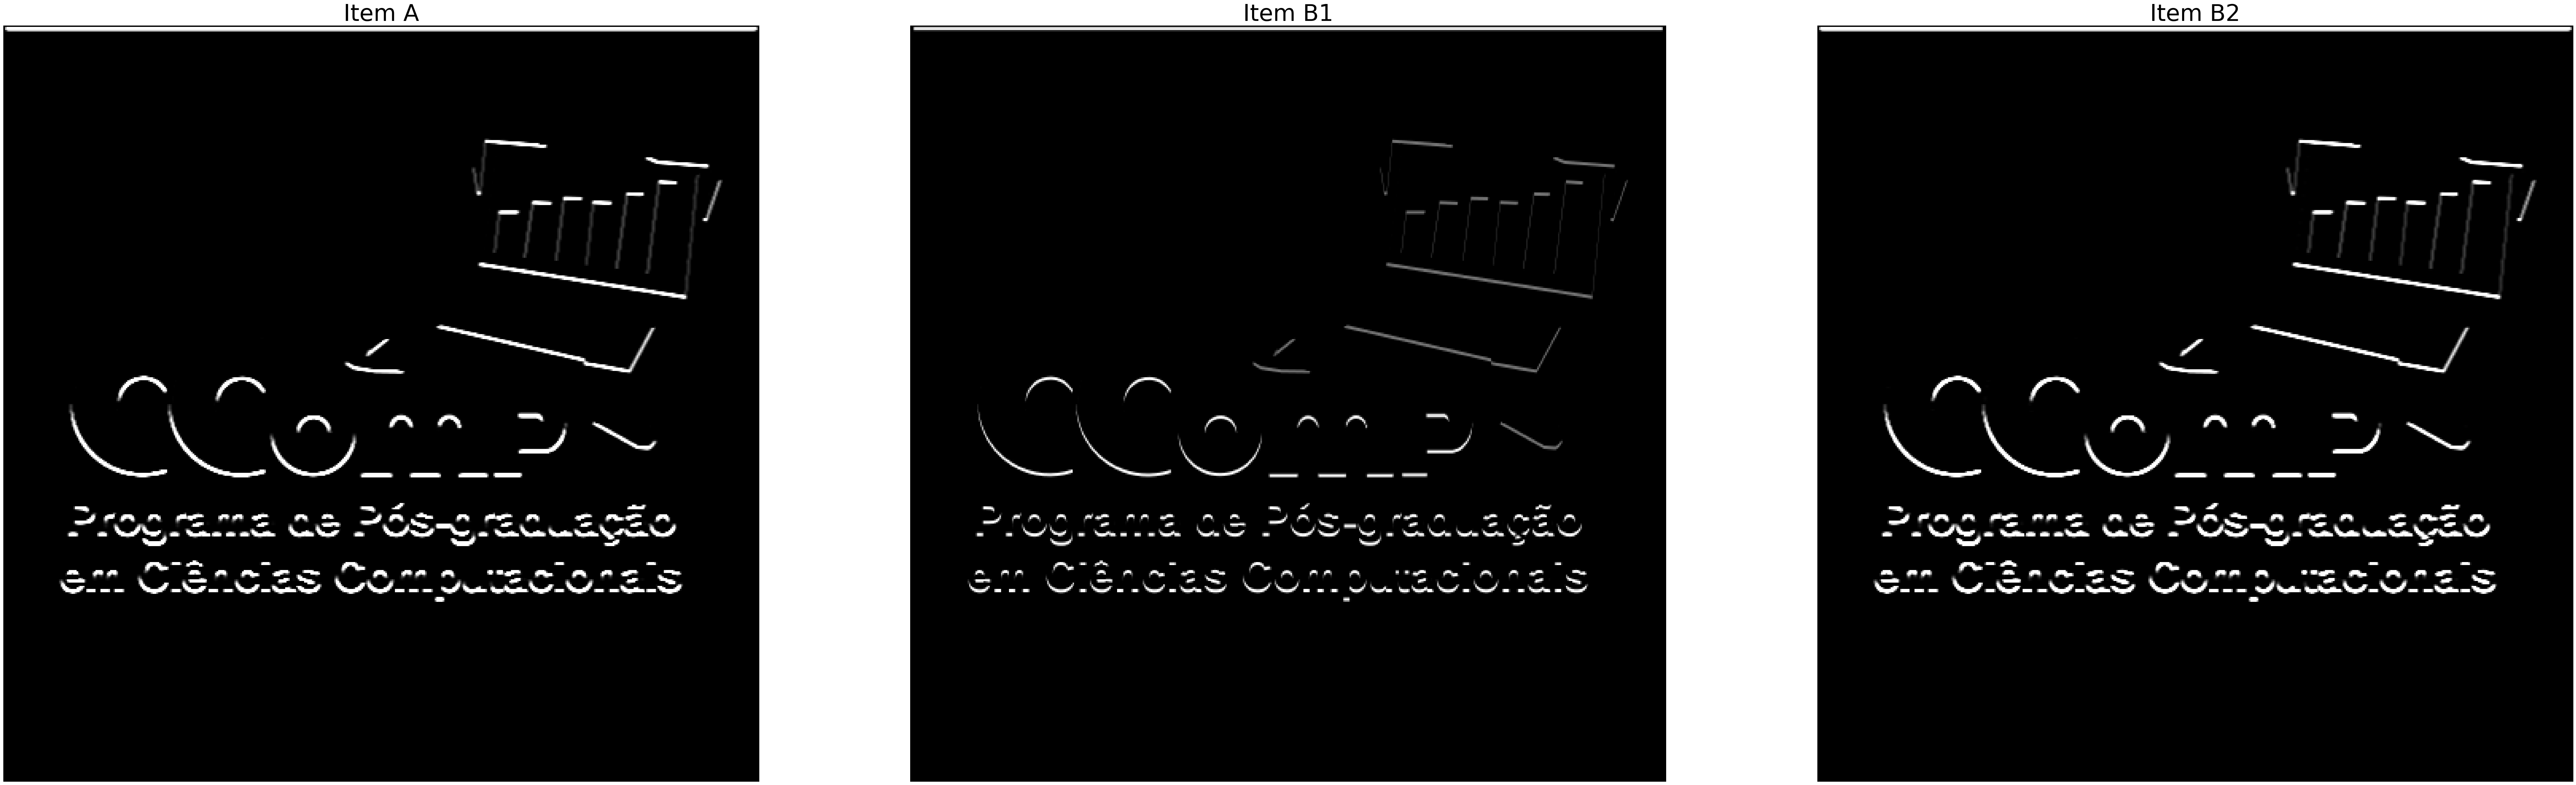

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

original = cv2.imread('CCompLogo1.png',0)
Gx = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])

Gxv = np.block(Gx[:,0:1])
Gxh = np.block(Gx[2:,:])

ItemA = cv2.filter2D(original,-1, Gx)

ItemB1 = cv2.filter2D(original,-1, Gxv)
ItemB2 = cv2.filter2D(ItemB1,-1, Gxh)

ItemC1 = cv2.filter2D(original,-1, Gxh)
ItemC2 = cv2.filter2D(ItemC1,-1, Gxv)

plt.figure(figsize = (5,15))

plt.title('Original')
plt.axis('off')
plt.imshow(original, cmap = 'gray')

fig, axs = plt.subplots(1,3)
fig.set_size_inches(w=100,h=80)

axs[0].set_title('Item A', fontsize =50)
axs[0].axis('off')
axs[0].imshow(ItemA, cmap = 'gray')

axs[1].set_title('Item B1', fontsize =50)
axs[1].axis('off')
axs[1].imshow(ItemB1, cmap = 'gray')

axs[2].set_title('Item B2', fontsize =50)
axs[2].axis('off')
axs[2].imshow(ItemB2, cmap = 'gray')



plt.show()

<Figure size 500x1500 with 0 Axes>

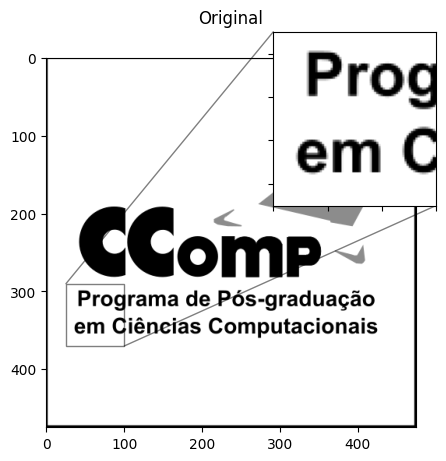

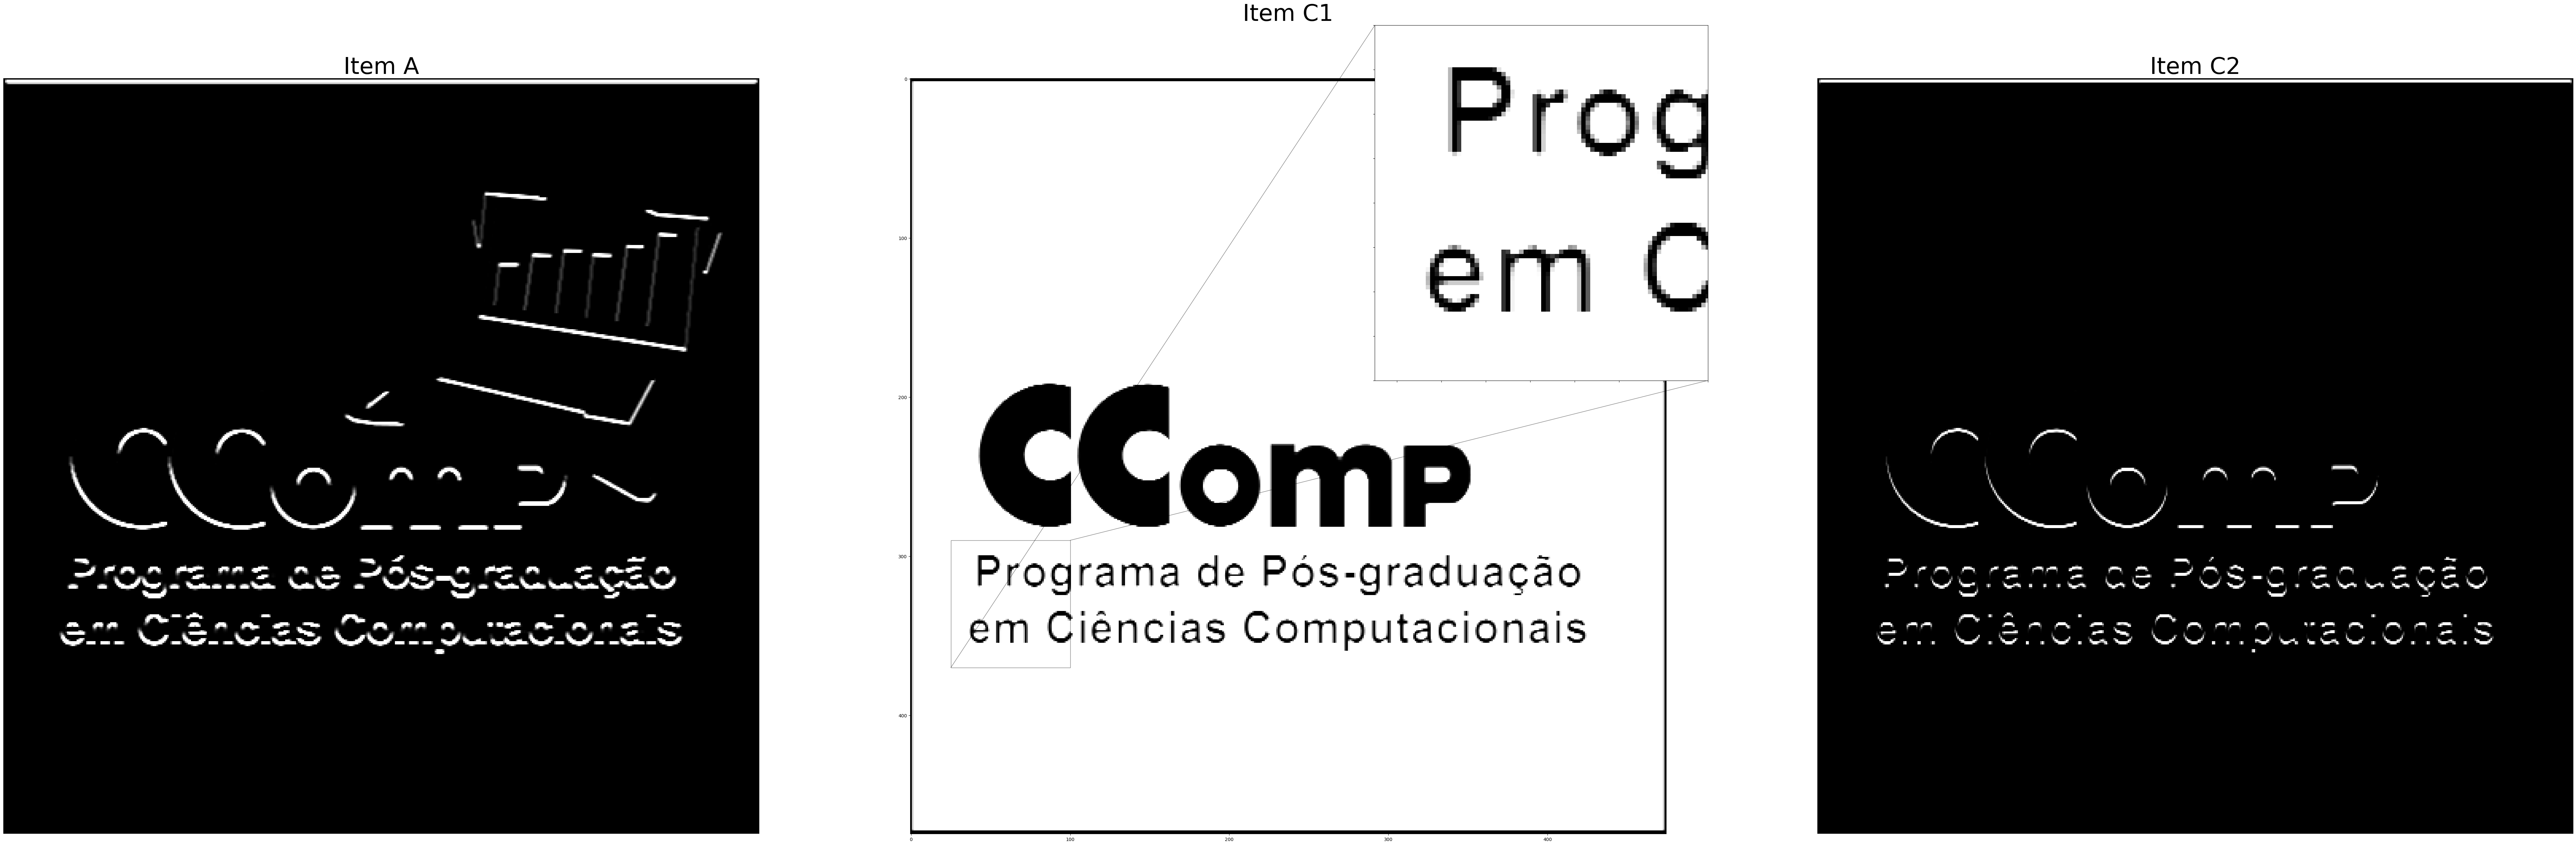

In [ ]:
plt.figure(figsize = (5,15))
fig, ax = plt.subplots()

ax.set_title('Original')
ax.axis('on')
x1, x2, y1, y2 = 25, 100, 370, 290  # subregion of the original image
axins = ax.inset_axes(
    [0.6, 0.6, 0.47, 0.47],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
axins.imshow(original, origin="lower", cmap = 'gray')
ax.indicate_inset_zoom(axins, edgecolor="black")
ax.imshow(original, cmap = 'gray')

fig, axs = plt.subplots(1,3)
fig.set_size_inches(w=100,h=80)

axs[0].set_title('Item A', fontsize =50)
axs[0].axis('off')
axs[0].imshow(ItemA, cmap = 'gray')

axs[1].set_title('Item C1', fontsize =50)
axs[1].axis('on')
axs[1].imshow(ItemC1, cmap = 'gray')
x1, x2, y1, y2 = 25, 100, 370, 290
axins = axs[1].inset_axes(
    [0.6, 0.6, 0.47, 0.47],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
axins.imshow(ItemC1, origin="lower", cmap = 'gray')
axs[1].indicate_inset_zoom(axins, edgecolor="black")

axs[2].set_title('Item C2', fontsize =50)
axs[2].axis('off')
axs[2].imshow(ItemC2, cmap = 'gray')

In [ ]:
import sklearn.metrics as skl_m
def mse(ItemA, ItemB):

  err = np.sqrt(skl_m.mean_squared_error(ItemA,ItemB))
  return err

print('RMSE do item a com item b2',mse(ItemA,ItemB2))
print('RMSE do item a com item c2',mse(ItemA,ItemC2))

RMSE do item a com item b2 0.481198872162682
RMSE do item a com item c2 1.626752794292855


* A partir das propriedades da convolução, o resultado obtido na estratégia B é similar a estratégia A, mas o obtido na C se diferencia dos demais.
  * Os erros  de B e C com A são, respectivamente, $0.481198872162682$ e $1.626752794292855$.

* Na estratégia b, primeiro é passado o kernel $Gx_v$, o qual funciona como um filtro passa alta direcional Norte/Sul. Isto é, destaca bordas verticais. Entretanto, bordas horizontais não são captadas por esse filtro, fator percebido em muitos dos tracejados das letras de _Ccomp_ as quais formam bordas na direção Horizontal com o fundo.
  * Em seguida, o kernel $Gx_h$ funciona como um suavizador. Como pode ser percebido nas bordas, as quais tornam-se maiores, e menos finas. Dessa forma, o resultado é praticamente o mesmo do obtido no item A.

* Na estratégia C, primeiro é passado o kernel $Gx_h$ o qual funciona como um suavizador, dessa forma, o ícone do histograma desparece, uma vez que possuía uma cor cinza mais próxima do fundo, dessa forma, essa região adquire um tom uniforme igual ao fundo. Já as letras, as quais possuem cor preta, bastante diferente do branco do fundo, tem suas bordas mais suavizadas, como pode ser observado nos inset axes das imagens original e C1
  * Em seguida, o kernel $Gx_v$ é passado, fazendo o destaque das bordas verticais, o que gera bordas mais finamente percebidas.
  * Como o ícone do histograma não estava presente na "primeira rodada", não está presente nessa também.

